# EDA of "default of credit card client"

Updated by Huei-Wen Teng on 20240915

Available at https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


## Overview on the data

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import math   # This will import math module

In [2]:
#write csv in spyder
dataset = pd.read_csv('default of credit card clients.csv')  

In [3]:
dataset.shape 

(30000, 25)

In [4]:
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
dataset.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
# drop some columns
dataset = dataset.drop(['Unnamed: 0'], axis = 1)


In [6]:
dataset.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [7]:
dataset.describe() # Data descriptions # P(Y=1) ~ 22%

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.084400,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,17.541391,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,3032.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
dataset.describe(include = 'all') # But, invisible variables, X11-X14?

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.084400,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,17.541391,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,3032.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
pd.set_option('display.max_columns', None)
dataset.describe(include = 'all') # But, invisible variables, X11-X14?

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.084400,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,17.541391,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,3032.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [12]:
print(dataset.nunique()) # Helps to suggest whether a variable is continuous (numerical) or discrete (categorical)

X1        81
X2         2
X3         7
X4         4
X5        56
X6        12
X7        11
X8        11
X9        11
X10       10
X11       10
X12    22723
X13    22346
X14    22026
X15    21548
X16    21010
X17    20604
X18     7943
X19     7899
X20     7518
X21     6937
X22     6897
X23     6939
Y          2
dtype: int64


In [13]:
pd.set_option('display.max_columns', None)　# Display all columns 

SyntaxError: invalid non-printable character U+3000 (948155132.py, line 1)

In [14]:
dataset['Y'].value_counts()     # show the


0    23364
1     6636
Name: Y, dtype: int64

In [15]:
dataset['Y'].value_counts(normalize = True)


0    0.7788
1    0.2212
Name: Y, dtype: float64

In [16]:
dataset['X6'].value_counts(normalize=True)

 0       0.491233
-1       0.189500
 1       0.122933
-2       0.091967
 2       0.088900
 3       0.010733
 4       0.002533
 5       0.000867
 8       0.000633
 6       0.000367
 7       0.000300
 3032    0.000033
Name: X6, dtype: float64

In [17]:
dataset['Y'].value_counts(normalize = True, sort = True)

0    0.7788
1    0.2212
Name: Y, dtype: float64

<Axes: title={'center': 'Freq dist of X2'}>

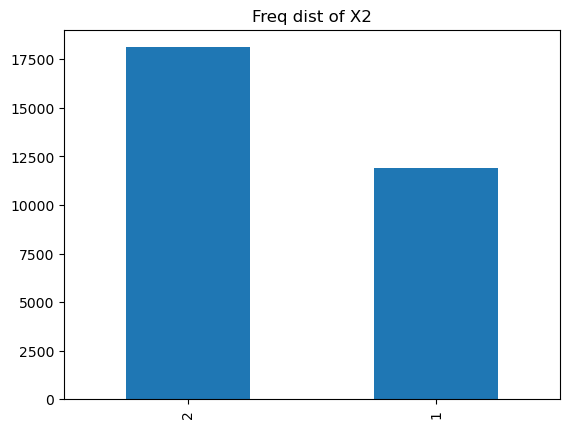

In [18]:
dataset['X2'].value_counts().plot.bar(title='Freq dist of X2')

<Axes: title={'center': 'Freq dist of X4'}>

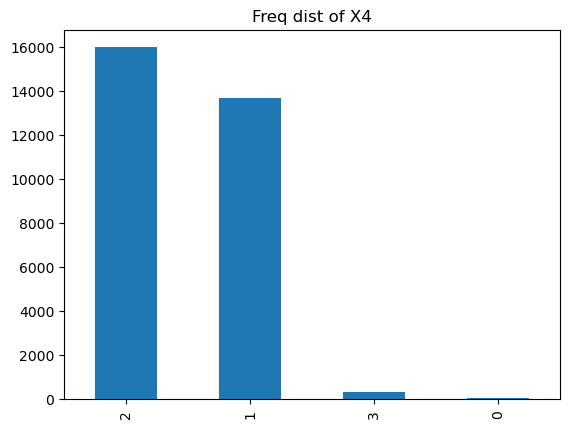

In [19]:
dataset['X4'].value_counts().plot.bar(title='Freq dist of X4')

In [20]:
xCategorical = ['Y', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
for col in xCategorical:    
    print(col)
    xtemp = dataset[col]
    print(xtemp.value_counts(normalize=True)) # relative frequencies 
    print('\n')

Y
0    0.7788
1    0.2212
Name: Y, dtype: float64


X2
2    0.603733
1    0.396267
Name: X2, dtype: float64


X3
2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: X3, dtype: float64


X4
2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: X4, dtype: float64


X6
 0       0.491233
-1       0.189500
 1       0.122933
-2       0.091967
 2       0.088900
 3       0.010733
 4       0.002533
 5       0.000867
 8       0.000633
 6       0.000367
 7       0.000300
 3032    0.000033
Name: X6, dtype: float64


X7
 0    0.524333
-1    0.201667
 2    0.130900
-2    0.126067
 3    0.010867
 4    0.003300
 1    0.000933
 5    0.000833
 7    0.000667
 6    0.000400
 8    0.000033
Name: X7, dtype: float64


X8
 0    0.525467
-1    0.197933
-2    0.136167
 2    0.127300
 3    0.008000
 4    0.002533
 7    0.000900
 6    0.000767
 5    0.000700
 1    0.000133
 8    0.000100
Name: X8, dtype: float64


X9
 0    0.548500
-1    0.189567
-2    0

<Axes: >

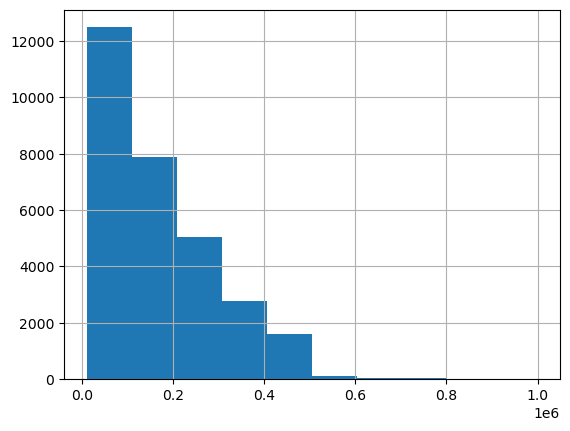

In [21]:
dataset['X1'].hist()


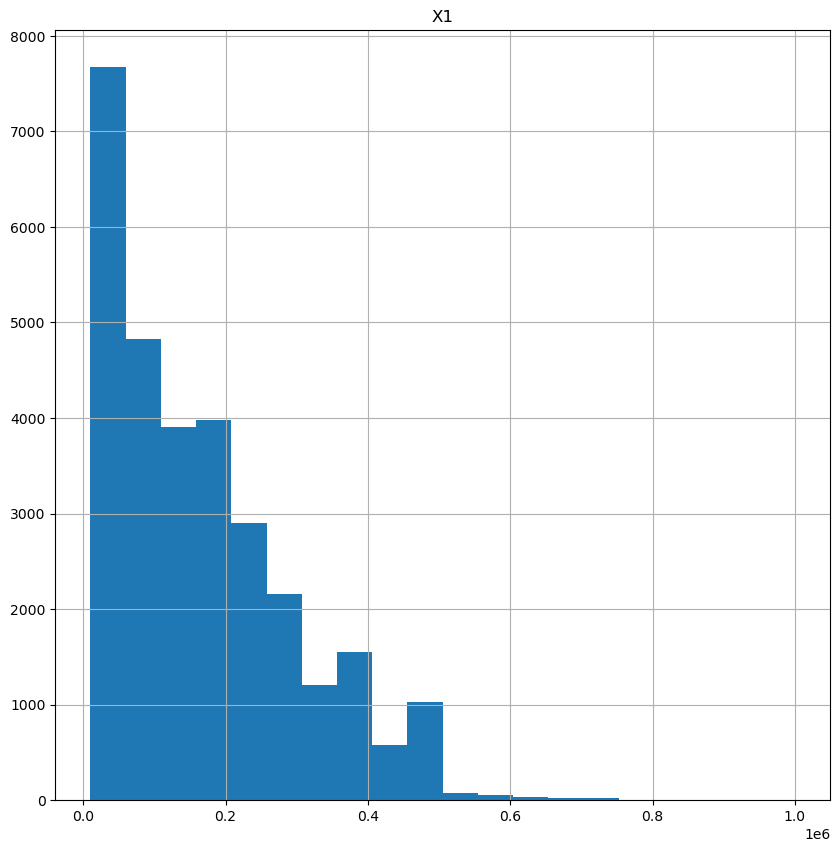

In [22]:
dataset['X1'].hist(figsize= (10,10), bins= 20) # obtain a histogram
plt.title('X1')
plt.savefig("histX1.png") 
plt.show()


### Kernel density plot (KDE)

<Axes: xlabel='X13', ylabel='Count'>

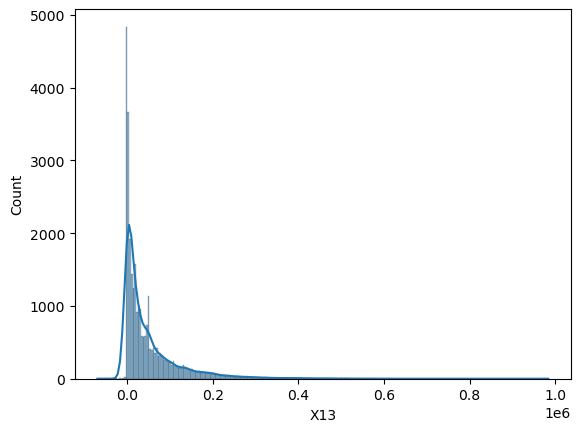

In [23]:
sns.histplot(data=dataset['X13'], kde=True)

<Axes: xlabel='X13', ylabel='Count'>

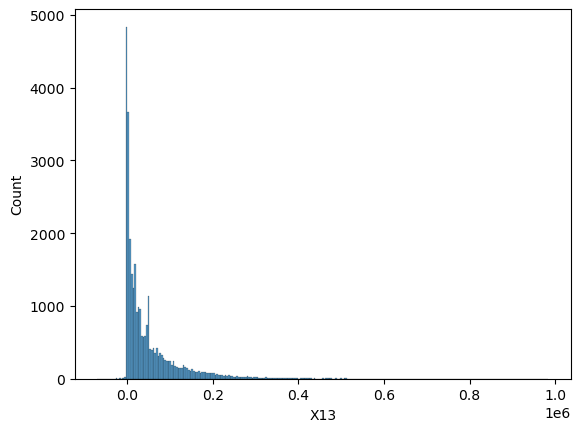

In [24]:
sns.histplot(data=dataset['X13'])

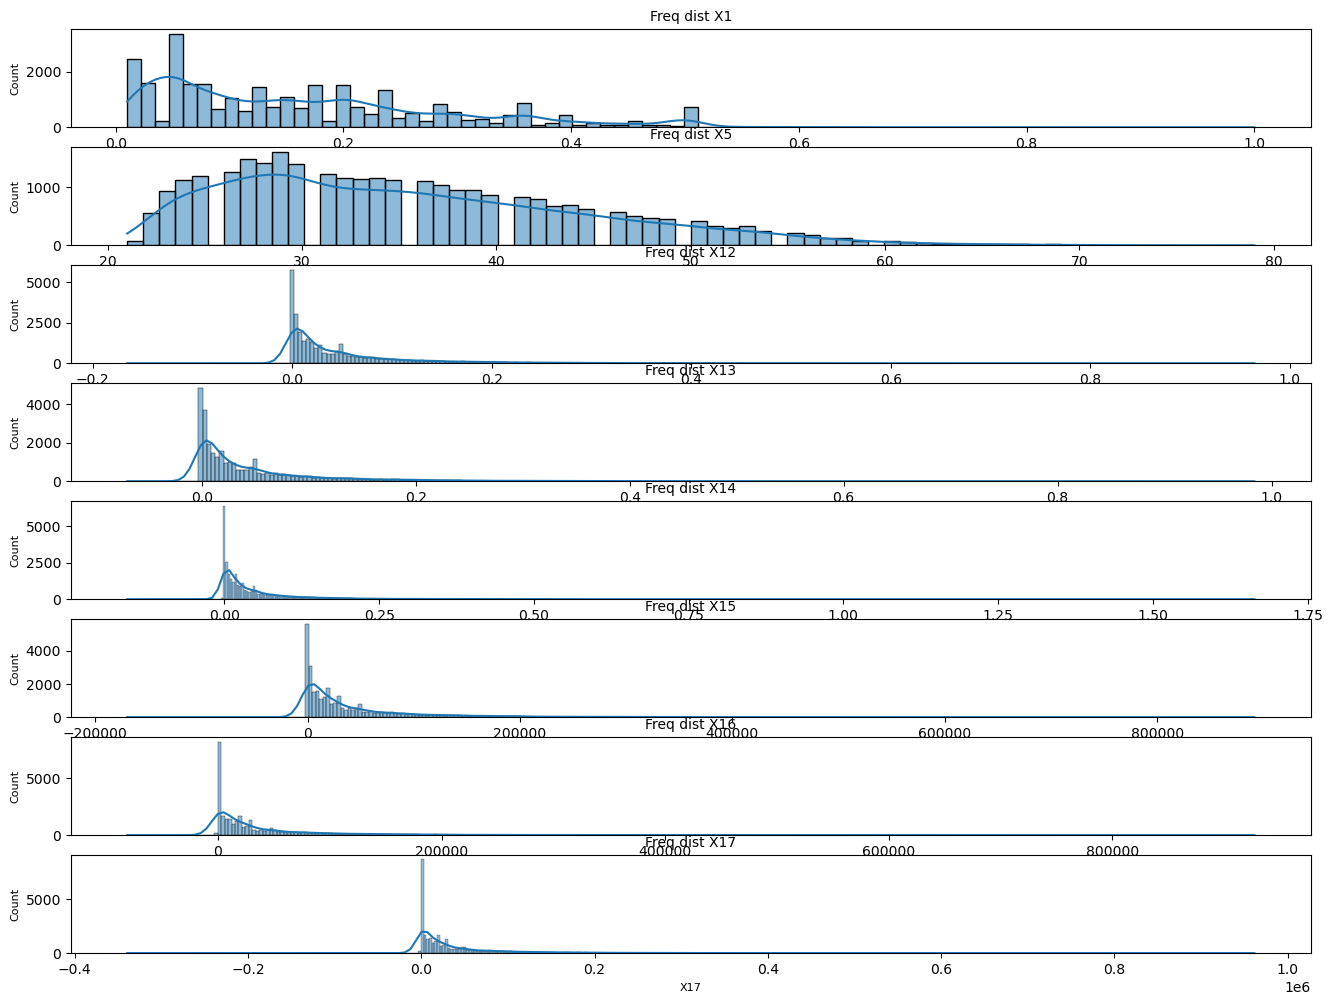

In [24]:
col_names = ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17'] 
fig, ax = plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
    sns.histplot(dataset[col_val], kde = True, ax = ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize = 8)
    ax[i].set_ylabel('Count', fontsize = 8)

plt.savefig("distCon.png") ## plt.savefig() needs to be in front of plt.show()
plt.show()

## Teng: Skewed to the right? 

/var/folders/fr/mwl6v1qj76v7_4tj9fch64ym0000gn/T/ipykernel_1716/2631134315.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(dataset[col_val]-min(dataset[col_val])+0.1), hist = True, ax = ax[i])
/var/folders/fr/mwl6v1qj76v7_4tj9fch64ym0000gn/T/ipykernel_1716/2631134315.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

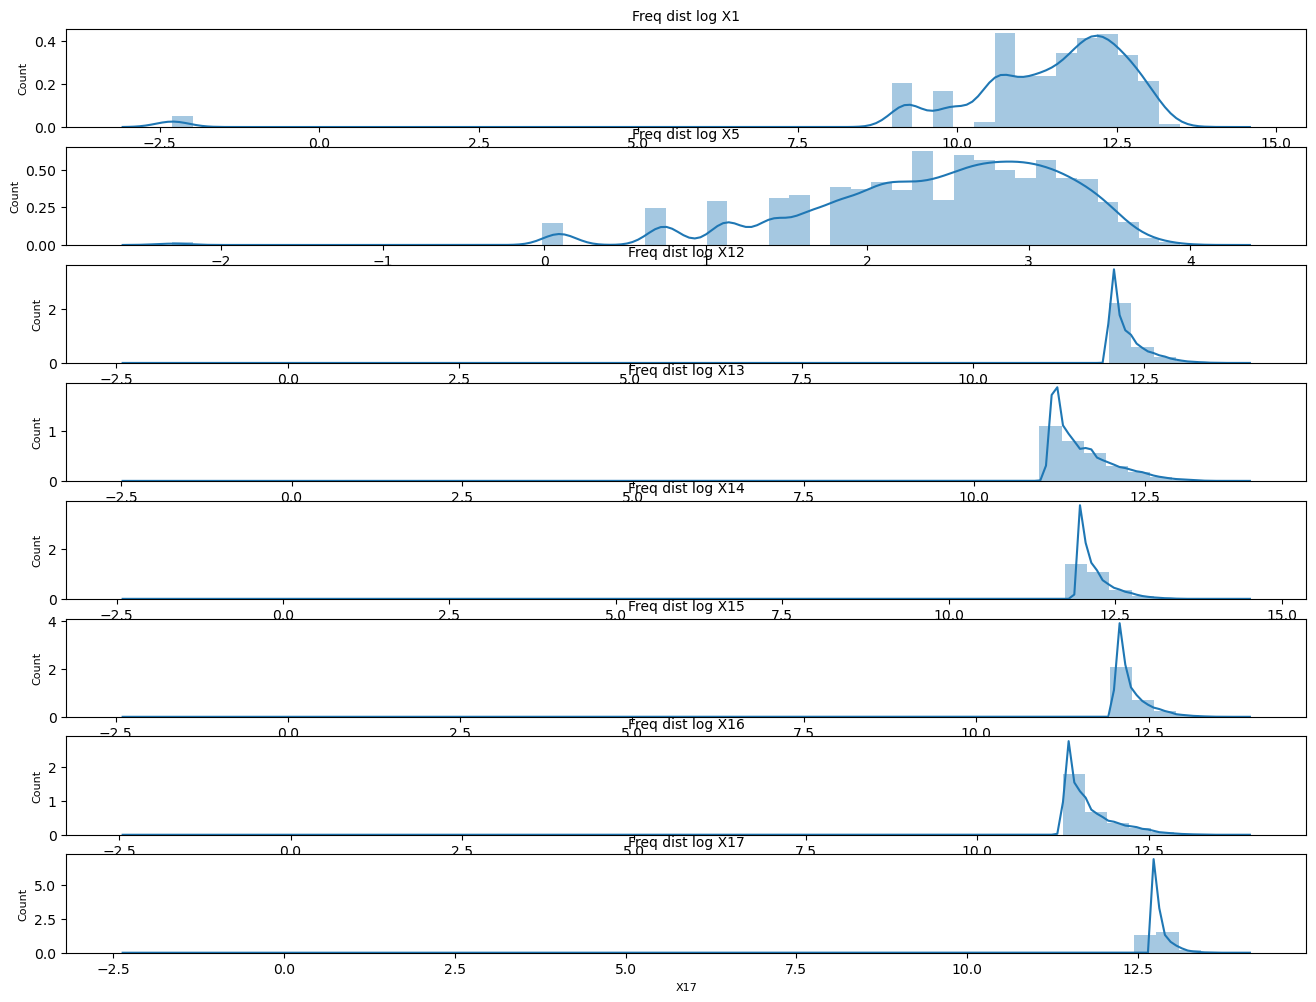

In [25]:
# Take logararithm for the continuous varialbes
col_names = ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17'] 
fig, ax = plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
    sns.distplot(np.log(dataset[col_val]-min(dataset[col_val])+0.1), hist = True, ax = ax[i])
    ax[i].set_title('Freq dist log '+ col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize = 8)
    ax[i].set_ylabel('Count', fontsize = 8)

plt.savefig("distCon.png") ## plt.savefig() needs to be in front of plt.show()
plt.show()



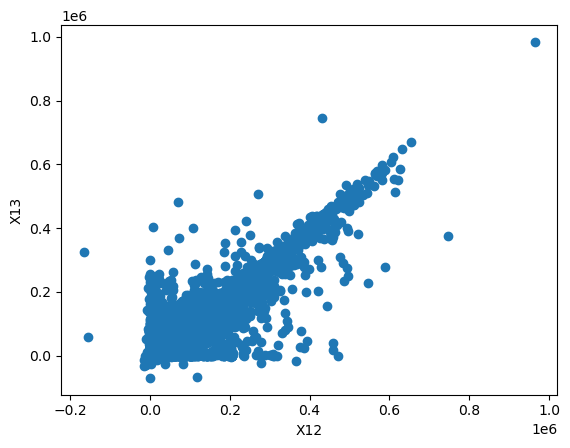

In [26]:
x = dataset['X12']
y = dataset['X13']
plt.scatter(x, y)       
plt.xlabel('X12')
plt.ylabel('X13')
plt.show()

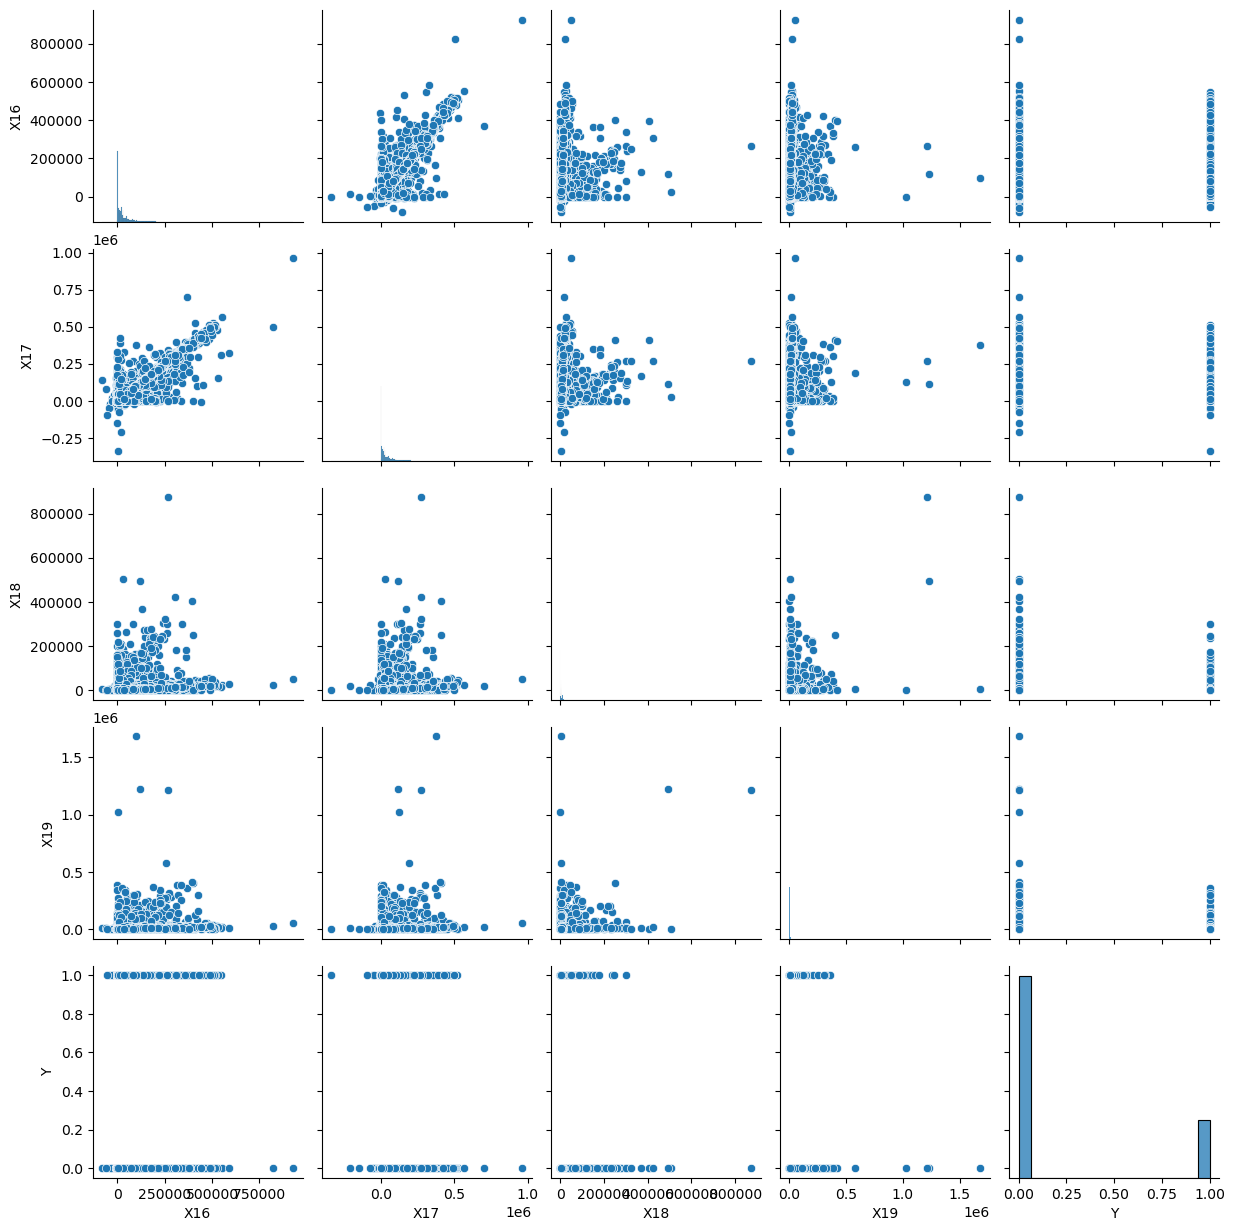

In [27]:
sns.pairplot(dataset[['X16','X17','X18','X19','Y']])
plt.show()

In [28]:
print(dataset.isnull().values.any())

False


In [29]:
dataset.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

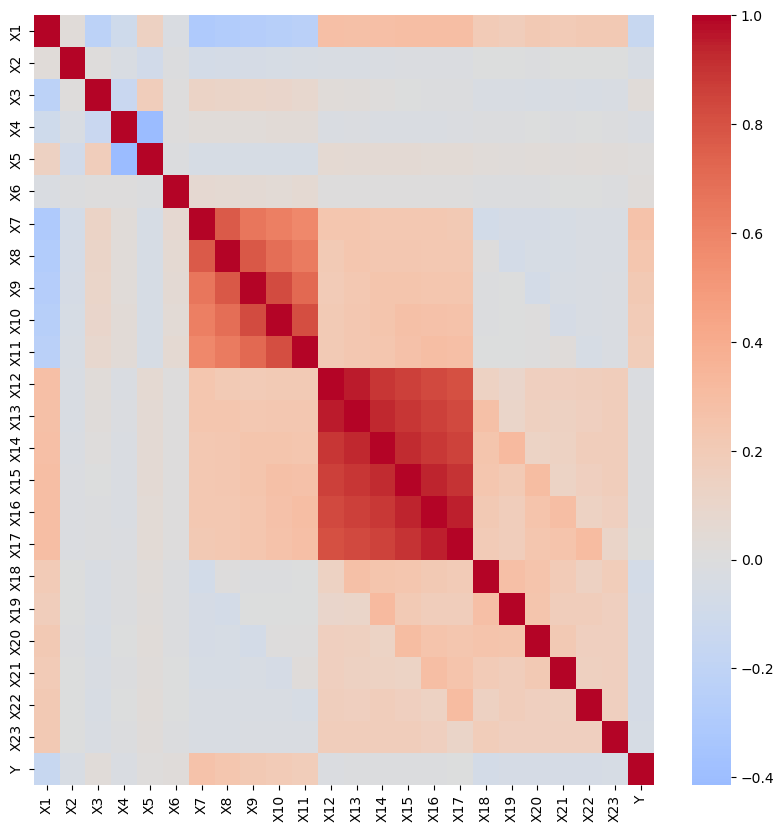

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot = False, center=0.0, cmap='coolwarm'); # cmap="YlGnBu",
#sns.heatmap(dataset.corr(), annot = False, center=0.0, cmap='YlGnBu'); # cmap="YlGnBu",
plt.savefig('heatmap.png')
plt.show()